In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
np.random.seed(42)

In [3]:
def plot_clusters(x,y,centroids, cluster):    
    fig, axes = plt.subplots(1, 2,  figsize=(15, 5))

    axes[0].set_title("Original Data")
    axes[0].scatter(x, y)
    axes[1].set_title("Clustered Data")
    axes[1].scatter(x,y,c=cluster, cmap='viridis')
    axes[1].scatter(centroids[:,0],centroids[:,1], c ="r", label="centroids")
    plt.legend()
    plt.show()

In [4]:
def calculate_distortion(X, centroids, cluster):
    distortion = 0
    for i, point in enumerate(X):
        distortion += np.sqrt(np.sum((centroids[int(cluster[i])] - point)**2))
    return distortion

In [5]:
def kmeans(data, c , centroids=None, distance_metric="euclidean", p=None):
    """
        data: 
            data points.
        c: 
            number of clusters.
        centroids: 
            location of the initial centroids.
            if centroids = None, select centroids randomly from data.
        distance_metric: 
            function that calculates the distance between each point and the centroids.
            available metrics: (euclidean, manhattan, chebyshev, minkowski), default is euclidian distance. 
        p:
            parameter of minkowski distance. Ignored otherwise.
    """
    distance_metrics = {"euclidean": lambda centroids, point: np.sqrt(np.sum((centroids - point)**2, axis=1)),
                        "manhattan": lambda centroids, point: np.sum(abs(centroids - point), axis=1),
                        "chebyshev": lambda centroids, point: np.max(abs(centroids - point), axis=1),
                        "minkowski": lambda centroids, point: np.sum(abs(centroids - point)**p, axis=1)**(1/p)}
    calc_dist = distance_metrics[distance_metric] #Choose the desired
    
    if centroids is None: #If centroids locations are not given, select random centroids from the data
        centroids_idx = np.random.choice(range(data.shape[0]), size=c) 
        centroids = data[centroids_idx]
        
    new_centroids = np.zeros((c,data.shape[1])) #Store the location of the new centroids
    
    cluster = np.zeros(data.shape[0]) #Store the cluster assigned to each point.
    
    distortions = []
    
    while True:
        for i, point in enumerate(data):
            distances = calc_dist(centroids, point) #Distance between point and each centroid
            cluster[i] = np.argmin(distances)       #Assign the point to the cluster with the smallest distance
            
        distortions.append(calculate_distortion(data, centroids, cluster))
        for i in range(c):
            new_centroids[i] = np.mean(data[cluster == i,:], axis=0)
            
        if (abs(centroids-new_centroids) ==0).all():
            break
        else:
            centroids = new_centroids.copy()
            
    plt.plot(distortions) 
    plt.title("Distortion Value")
    plt.xlabel("iteration"), plt.ylabel("Distortion")
    plt.show()
    return centroids, cluster

#### Generate random points in clusters:

In [6]:
N = 200 #Number of points.
data = np.random.randint(0,200, size = (N,2))
x, y = data[:,0], data[:,1]

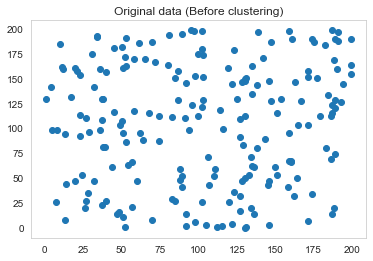

In [7]:
plt.scatter(x, y)
plt.grid(), plt.title("Original data (Before clustering)")
plt.show()

#### Using K-means algorithm to cluster the data into 4 clusters:

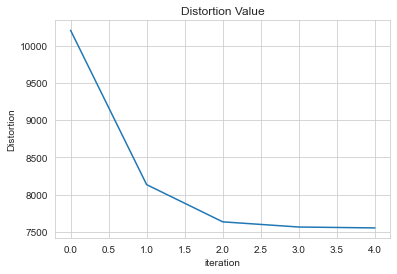

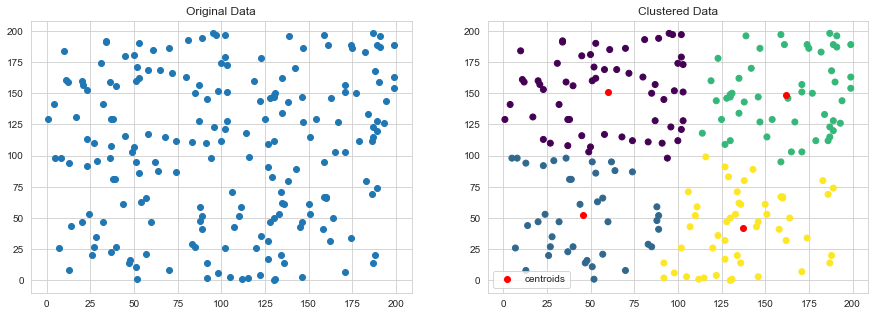

In [8]:
centroids, cluster = kmeans(data, 4, distance_metric="euclidean")
plot_clusters(x,y,centroids, cluster)

#### Trying 3 clusters:

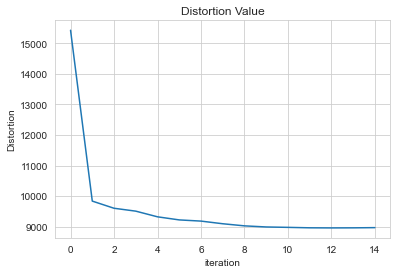

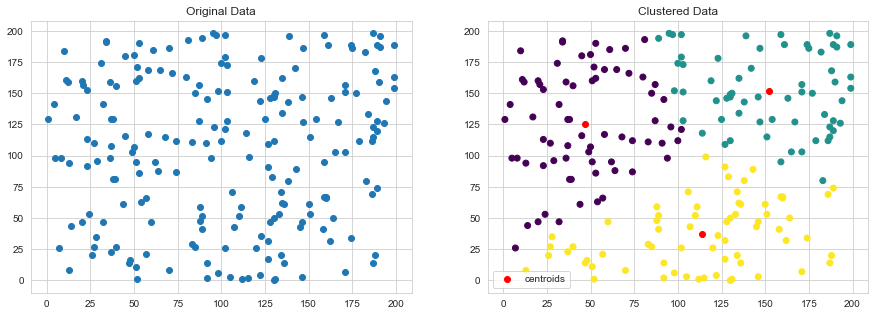

In [9]:
centroids, cluster = kmeans(data, 3, distance_metric="euclidean")
plot_clusters(x,y,centroids, cluster)

#### Trying different distance metrics:

Using Euclidean distance:


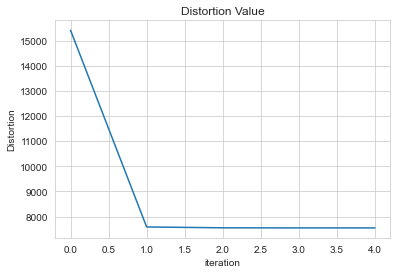

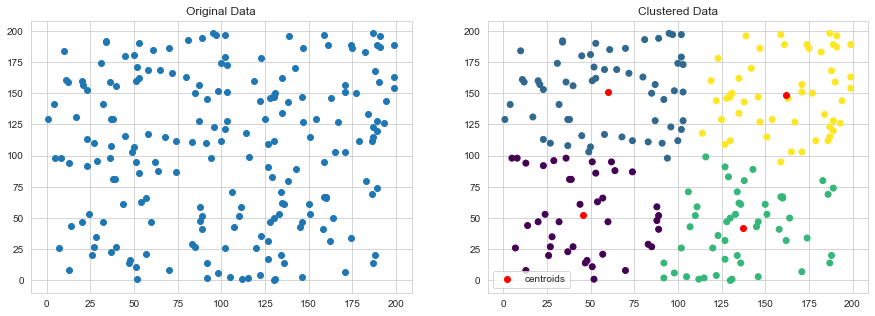

In [10]:
print("Using Euclidean distance:")
#I will use fixed initial centroids to see the effect of changing the distance metric
centroids = np.array([[0,0],
                      [0,200],
                      [200,0],
                      [200,200]])

centroids, cluster = kmeans(data, 4, centroids, distance_metric="euclidean")
plot_clusters(x,y,centroids, cluster)

Using Manhattan distance:


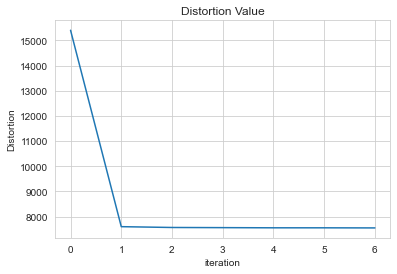

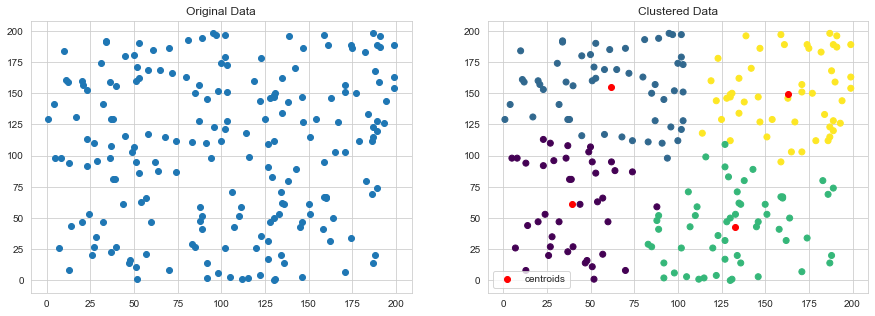

In [11]:
print("Using Manhattan distance:")
centroids = np.array([[0,0],
                      [0,200],
                      [200,0],
                      [200,200]])

centroids, cluster = kmeans(data, 4, centroids, distance_metric="manhattan")
plot_clusters(x,y,centroids, cluster)

Using Chebyshev distance:


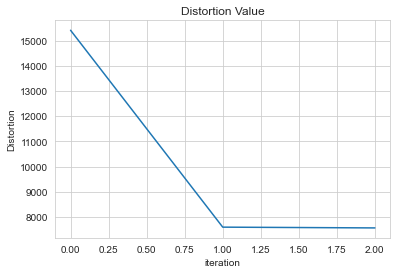

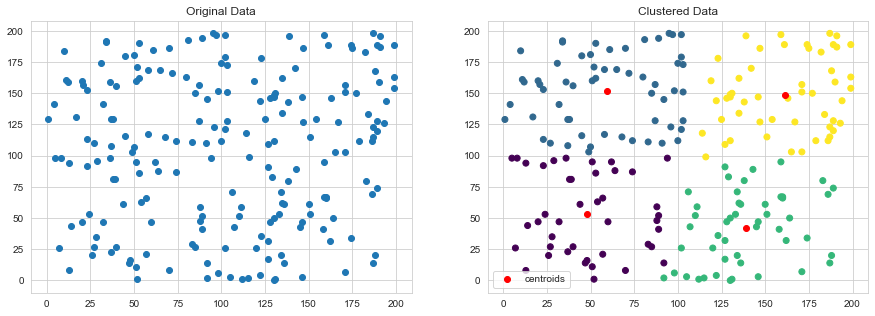

In [12]:
print("Using Chebyshev distance:")
centroids = np.array([[0,0],
                      [0,200],
                      [200,0],
                      [200,200]])

centroids, cluster = kmeans(data, 4, centroids, distance_metric="chebyshev")
plot_clusters(x,y,centroids, cluster)

Using Minkowski distance:


<ipython-input-5-9396c07c4660>:19: RuntimeWarning: invalid value encountered in power
  "minkowski": lambda centroids, point: np.sum(abs(centroids - point)**p, axis=1)**(1/p)}


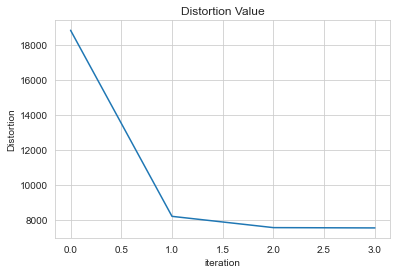

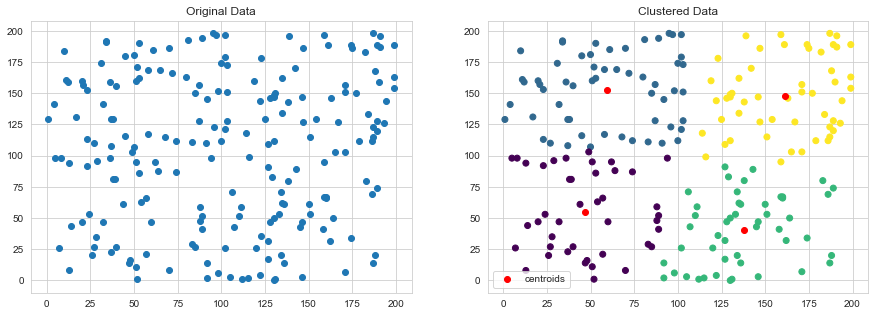

In [13]:
print("Using Minkowski distance:")
centroids = np.array([[0,0],
                      [0,200],
                      [200,0],
                      [200,200]])

centroids, cluster = kmeans(data, 4, centroids, distance_metric="minkowski", p=4)
plot_clusters(x,y,centroids, cluster)